In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing csv file

data = pd.read_csv(r"C:\Users\user\Downloads\UberTrips.csv")
data["Date/Time"] = pd.to_datetime(data["Date/Time"])

In [46]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


This dataset contains data about date and time, latitude and logitude and a Base column that contains a code affiliated with the uber pickup, let’s prepare the data and use it to analyze the Uber trips according to days and hours:

In [47]:
#Spliting the datetime into Days, Weekdays and Hours

data["Days"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekdays"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hours"] = data["Date/Time"].apply(lambda x: x.hour)

In [48]:
data.head()

,Date/Time,Lat,Lon,Base,Days,Weekdays,Hours
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


I am using the Uber trips for month of September so let’s have a look at each day to see on which day the Uber trips were highest:

C:\Users\user\AppData\Local\Temp\ipykernel_7408\1957910951.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Days"])


<Axes: xlabel='Days', ylabel='Density'>

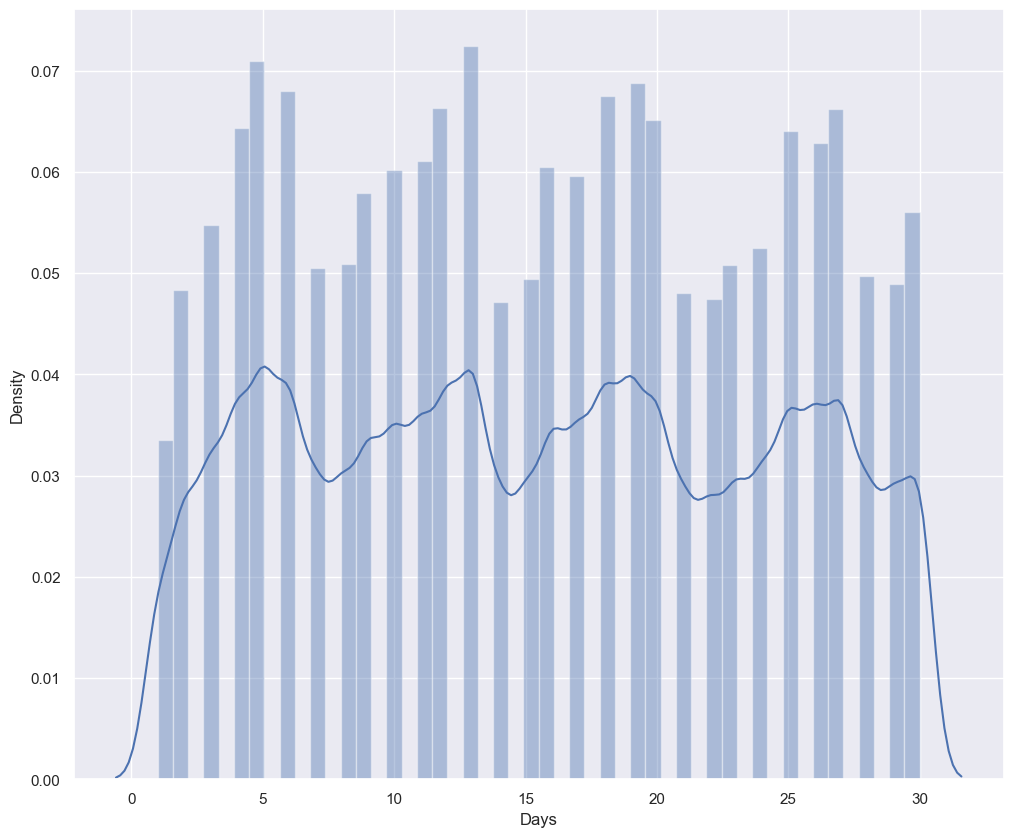

In [64]:
#Graph showing the density of uber trips for each day in the month of september

sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Days"])

By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends. Now let’s analyze the Uber trips according to the hours:

C:\Users\user\AppData\Local\Temp\ipykernel_7408\298784390.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hours"])


<Axes: xlabel='Hours', ylabel='Density'>

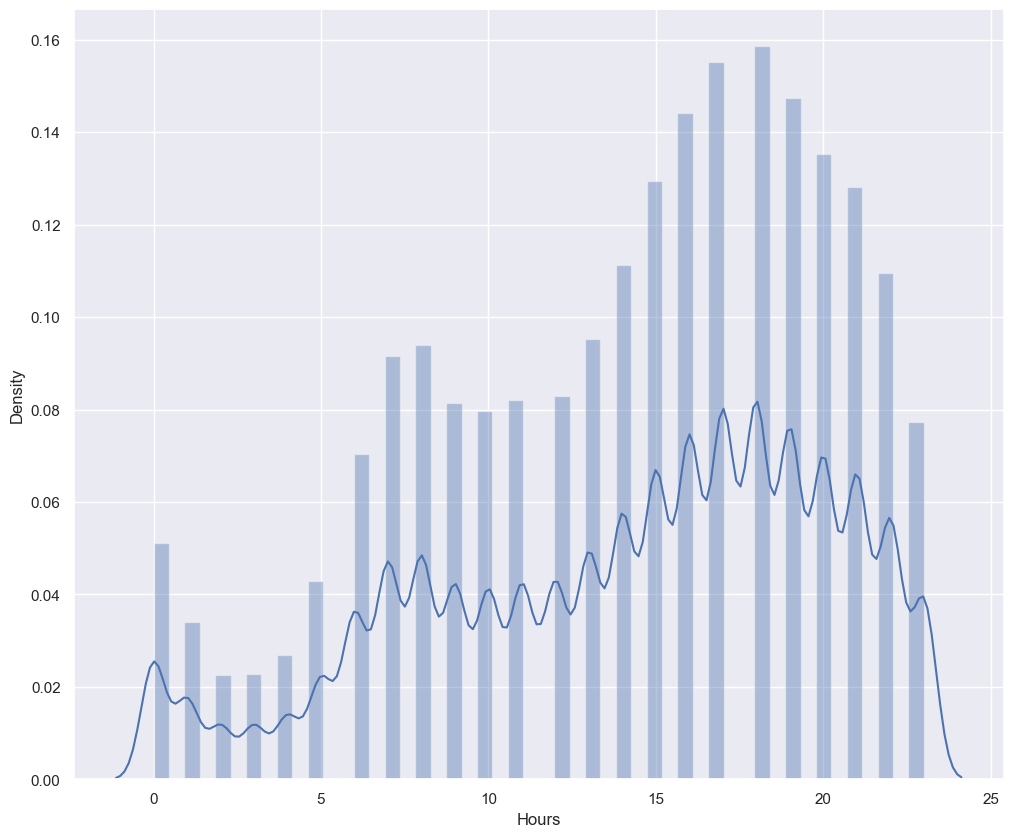

In [63]:
#Graph showing the density of uber trips according to hours

sns.distplot(data["Hours"])

According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing. Now let’s analyze the Uber trips according to the weekdays:

C:\Users\user\AppData\Local\Temp\ipykernel_7408\4172899236.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Weekdays"])


<Axes: xlabel='Weekdays', ylabel='Density'>

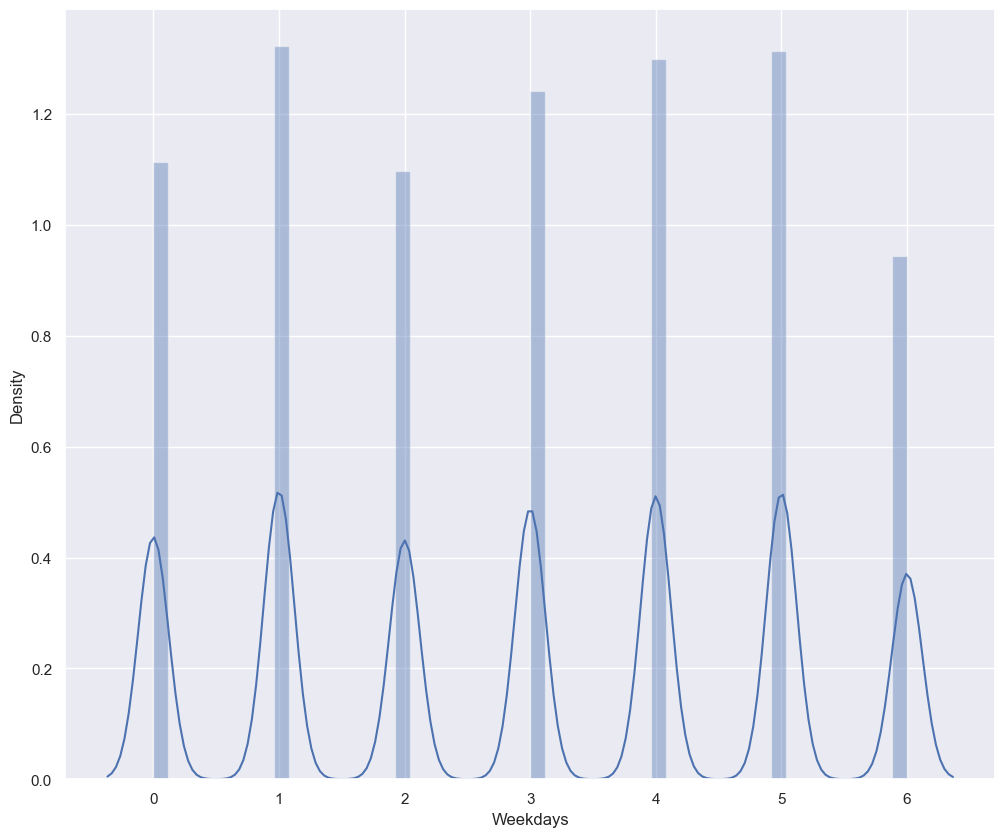

In [57]:
#Graph showing the density of uber trips according to hours

sns.distplot(data["Weekdays"])

In the above figure '0' indicates Sunday, Monday has the highest Uber trips, followed by Friday, Thursday and Wednesday. Sundays and Tuesday have almost the same number of Uber trip. Saturday has the lowest Uber Trips.
We can conclude that, People use Uber more on Sundays for outings and on Monday to get to work, it reduces on Tuesday but steadily increase from Wednesday to Friday and goes to it lowest on Saturday.

Now let’s have a look at the correlation of hours and weekdays on the Uber trips:

<Axes: xlabel='Hours', ylabel='Weekdays'>

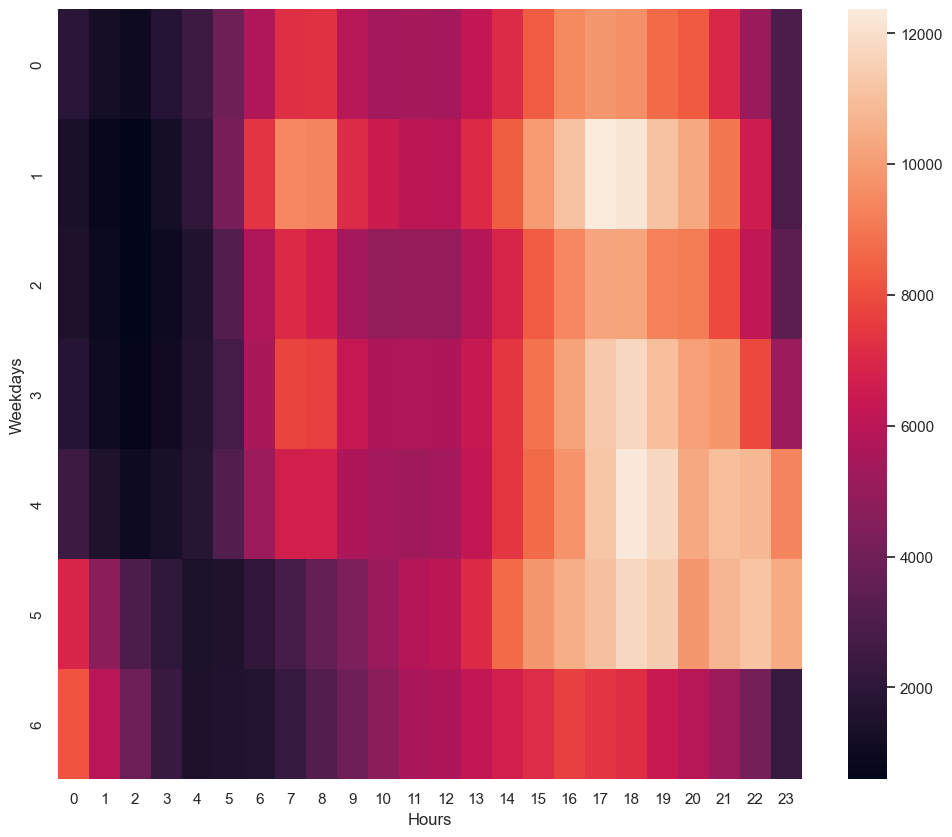

In [58]:
# Correlation of Weekdays and Hours

df = data.groupby(["Weekdays", "Hours"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

We can use the data about longitude and latitude, to plot the density of Uber trips according to the data provided:

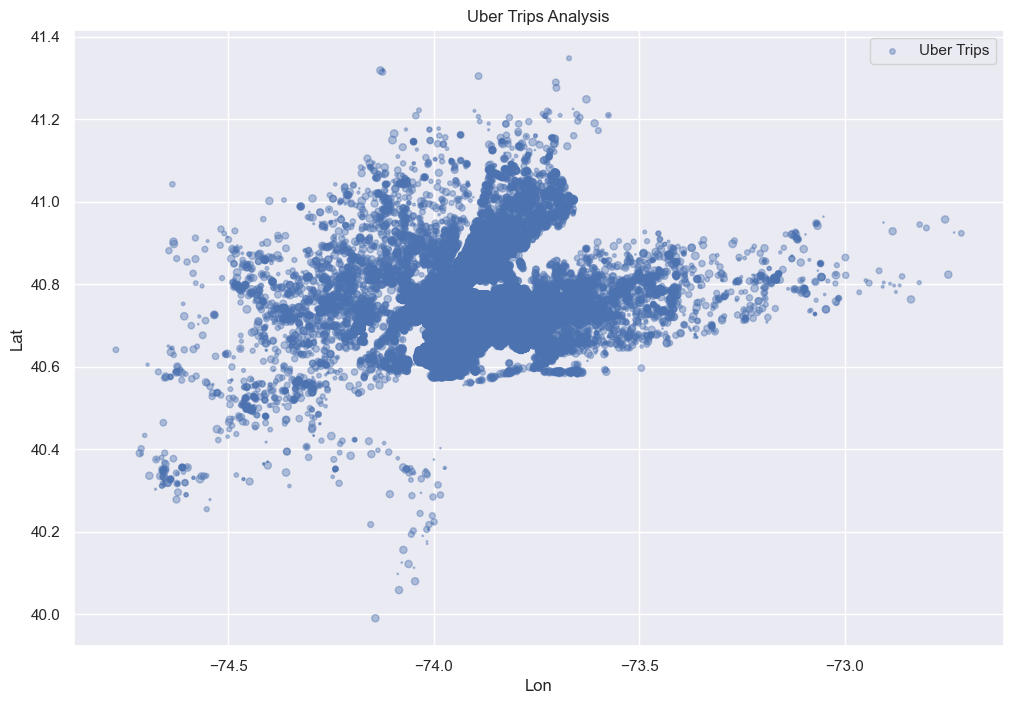

In [68]:
#Graph showing the density of uber trips density of Uber trips according to the longitude and latitude

data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Days'], label='Uber Trips',
figsize=(12, 8))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

In summary:
    1. Monday is the most profitable day of the week for Uber trips
    2. Saturdays have the lowest number of Uber Trips, therefore making it the worst day of the week for Uber drivers.
    3. Uber trips start to rise at 5 am and steadily increses till it peaks at 6pm 
    